# Анализ эффективности внедрения платной подписки на сервис проката самокатов GoFast

Данный проект направлен на изучение демографического состава пользователей сервиса проката самокатов GoFast, выявление особенностей их поведения и потребления услуги, а также оценку потенциальной выгоды от расширения предложений платных подписок. Используя предоставленные данные о клиентах, истории поездок и сведения о ценах на подписку, команда должна выявить ключевые сегменты клиентов, разработать рекомендации по оптимизации тарифных планов и предложить стратегию продвижения платных подписок для увеличения доходов компании.
Проект позволит лучше понять потребности целевой аудитории, повысить лояльность постоянных клиентов и привлечь новых подписчиков благодаря персонализированным условиям подписки и улучшению качества обслуживания.


## Цель проекта

Оценить потенциал повышения дохода сервиса проката самокатов GoFast путем анализа клиентской базы и разработки стратегии внедрения платных подписок.

## Описание данных

Таблица с пользователями `users_go.csv`

- `user_id` — уникальный идентификатор пользователя.

- `name` — имя пользователя.

- `age` — возраст.

- `city` — город.

- `subscription_type` — тип подписки: `free`, `ultra`.

Таблица с поездками `rides_go.csv`

- `user_id` — уникальный идентификатор пользователя.

- `distance` — расстояние в метрах, которое пользователь проехал в текущей сессии.

- `duration` — продолжительность сессии в минутах, то есть время с того момента, как пользователь нажал кнопку «Начать поездку», до того, как он нажал кнопку «Завершить поездку».

- `date` — дата совершения поездки.

Таблица с подписками `subscriptions_go.csv`

- `subscription_type` — тип подписки.

- `minute_price` — стоимость одной минуты поездки по этой подписке.

- `start_ride_price` — стоимость начала поездки.

- `subscription_fee` — стоимость ежемесячного платежа.

---
### Задание 1. Загрузка данных

#### Задача 1.1 Импорт библиотеки pandas

In [2]:
import pandas as pd

#### Задача 1.2 Чтение данных

In [3]:
df_users_go = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
df_rides_go = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
df_subscriptions_go = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')


<details>
<summary>Открыть подсказку</summary>
Чтобы распечатать несколько датафреймов в одной ячейке, можно воспользоваться функцией <code>display()</code>.
</details>

#### Задача 1.3 Печать первых строк

In [4]:
display(df_users_go.head())
display(df_rides_go.head())
display(df_subscriptions_go.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


#### Задача 1.4 Подсчёт строк

In [5]:
print (len(df_users_go), len(df_rides_go), len(df_subscriptions_go))

1565 18068 2


---
### Задание 2. Знакомство с данными и их предварительная подготовка


#### Задача 2.1 Определение типов данных

In [6]:
df_rides_go.dtypes 

user_id       int64
distance    float64
duration    float64
date         object
dtype: object

#### Задача 2.2 Преобразование формата даты

In [7]:
df_rides_go['date'] = pd.to_datetime(df_rides_go['date'])

#### Задача 2.3 Создание столбца с месяцем

In [8]:
df_rides_go['month'] = df_rides_go['date'].dt.month

#### Задача 2.4 Поиск дублей и пропусков

In [9]:
missing_values = df_users_go.isna().sum().sum()
duplicate_rows = df_users_go.duplicated().sum()

print(missing_values, duplicate_rows)

0 31


#### Задача 2.5 Заполнение пропусков и удаление дублей

In [10]:
df_users_go.drop_duplicates(inplace=True)

#### Задача 2.6 Округление длительности поездки

In [11]:
df_rides_go['duration'] = df_rides_go['duration'].round().astype(int)

---
### Задание 3. Исследовательский анализ данных


#### Задача 3.1 Импорт библиотеки matplotlib
Импортируйте библиотеку matplotlib.pyplot с сокращением `plt`.

In [12]:
import matplotlib.pyplot as plt

#### Задача 3.2 Количество пользователей по городам.

In [13]:
users_by_city_count = df_users_go['city'].value_counts().sort_values(ascending=False)
users_by_city_count.city = 'count'

print(users_by_city_count)

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64


#### Задача 3.3 Количество пользователей подписки

In [14]:
subscription_type_count = df_users_go['subscription_type'].value_counts()
subscription_type_count.name = 'subscription_type'

print(subscription_type_count)

subscription_type
free     835
ultra    699
Name: subscription_type, dtype: int64


#### Задача 3.4 Круговая диаграмма

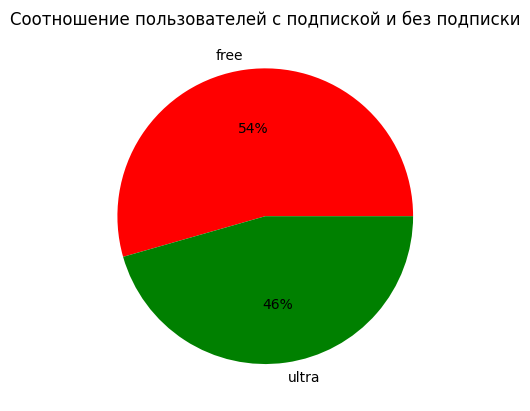

In [15]:
subscription_type_count.plot(
    kind='pie',
    title='Соотношение пользователей с подпиской и без подписки',
    autopct='%.0f%%', 
    ylabel='', 
    colors=['red', 'green'] 
)

plt.show()

#### Задача 3.5 Гистограмма возрастов

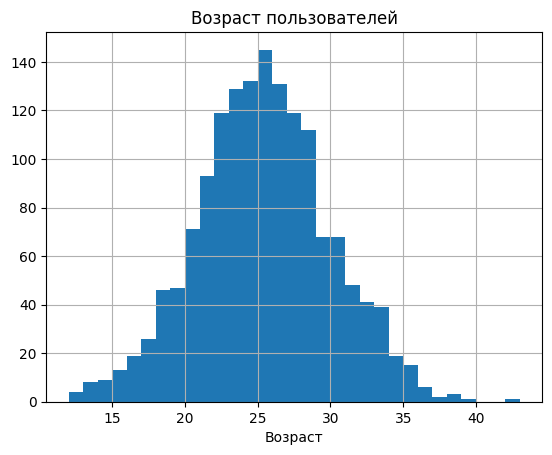

In [16]:
n_bins = df_users_go['age'].max() - df_users_go['age'].min()

df_users_go['age'].hist(bins=n_bins)

plt.title('Возраст пользователей')
plt.xlabel('Возраст')

plt.show()

#### Задача 3.6 Несовершеннолетние пользователи

In [17]:
users_under_18 = len(df_users_go[df_users_go['age'] < 18])
total_users = df_users_go.shape[0]
users_under_18_ratio = round(users_under_18 / total_users * 100)

print(f'Доля несовершеннолетних пользователей самокатов составляет {users_under_18_ratio}%.')

Доля несовершеннолетних пользователей самокатов составляет 5%.


#### Задача 3.7 Характеристики длительности поездки


In [18]:
duration_mean = round(df_rides_go['duration'].mean())
duration_std =round(df_rides_go['duration'].std())

duration_pct25 = round(df_rides_go['duration'].quantile(0.25))
duration_pct75 = round(df_rides_go['duration'].quantile(0.75))

print(f'Средняя длительность поездки {duration_mean} минут со стандартным отклонением {duration_std}. Основная часть поездок занимает от {duration_pct25} до {duration_pct75} минут.')

Средняя длительность поездки 18 минут со стандартным отклонением 6. Основная часть поездок занимает от 14 до 22 минут.


---
### Задание 4. Объединение данных

#### Задача 4.1 Объединение таблицы пользователей и поездок

In [19]:
df = pd.merge(df_users_go, df_rides_go, on='user_id', how='left')

#### Задача 4.2 Присоединение информации о подписках


In [20]:
df = pd.merge(df, df_subscriptions_go, on=['subscription_type'])

#### Задача 4.3. Размеры объединённого датафрейма

In [21]:
# Выводим первые строки датафрейма
display(df.head())

# Выводим количество строк и столбцов в объединённом датафрейме
n_rows, n_cols = df.shape
print(f"В полученном датафрейме {n_rows} строк и {n_cols} столбцов.")


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26,2021-08-28,8,6,0,199


В полученном датафрейме 18068 строк и 12 столбцов.


#### Задача 4.4 Отдельные датафреймы для пользователей с подпиской и без

In [22]:
# Создание датафрейма с пользователями с подпиской (ultra)
df_ultra = df[df['subscription_type'] == 'ultra']

# Создание датафрейма с пользователями без подписки (free)
df_free = df[df['subscription_type'] == 'free']

#### Задача 4.5 Гистограмма длительности поездок для обоих групп

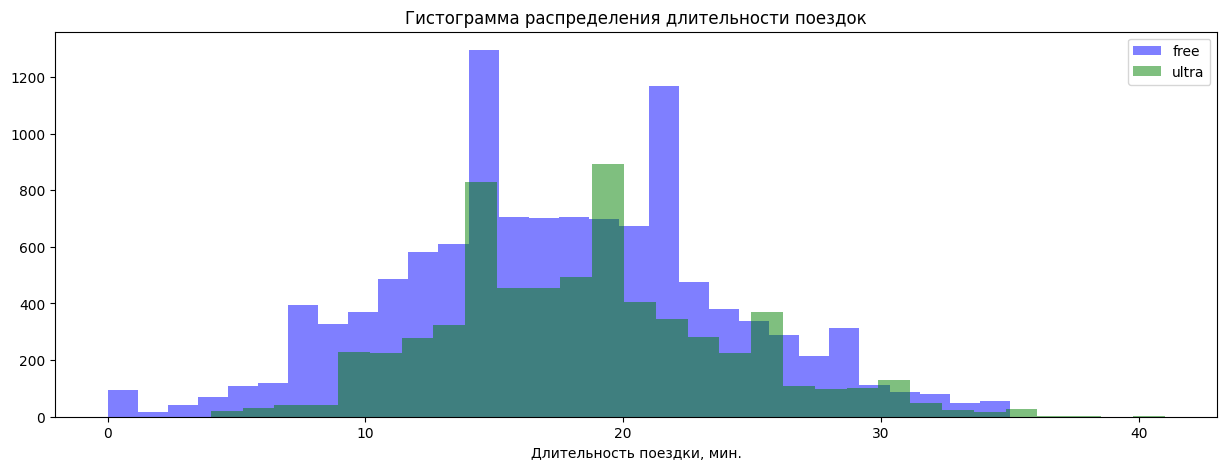

Средняя длительность поездки для пользователей без подписки 17 мин, а для пользователей с подпиской 19 мин


In [23]:
# Гистограмма длительности поездки для пользователей с подпиской и без
plt.figure(figsize=(15, 5))

# Рисуем гистограмму для пользователей без подписки
plt.hist(df_free['duration'], bins=30, alpha=0.5, color='blue', label='free')

# Рисуем гистограмму для пользователей с подпиской
plt.hist(df_ultra['duration'], bins=30, alpha=0.5, color='green', label='ultra')

# Настройка подписи осей и заголовка
plt.xlabel('Длительность поездки, мин.')
plt.title('Гистограмма распределения длительности поездок')

# Легенда для различения категорий
plt.legend()

# Показываем график
plt.show()

# Расчет средней длительности поездки для пользователей без подписки
mean_duration_free = round(df_free['duration'].mean())

# Расчет средней длительности поездки для пользователей с подпиской
mean_duration_ultra = round(df_ultra['duration'].mean())

# Выводим на экран среднюю длительность поездки
print(f'Средняя длительность поездки для пользователей без подписки {mean_duration_free} мин, а для пользователей с подпиской {mean_duration_ultra} мин')

---
### Задание 5. Подсчёт выручки

#### Задача 5.1 Данные сгруппированные по нужным колонкам


In [24]:
df_gp = df.groupby(['user_id', 'name', 'subscription_type', 'month'], as_index=False)

#### Задача 5.2 Подсчёт агрегированных метрик

In [25]:
# Создаем новый датафрейм df_agg, в котором для каждой группы рассчитаем агрегированные значения
df_agg = df_gp.agg(
    total_distance=('distance', 'sum'),        # Сумма расстояний
    total_duration=('duration', 'sum'),        # Сумма длительности
    rides_count=('duration', 'count'),         # Количество поездок
    subscription_type=('subscription_type', 'first'),  # Берем первое значение типа подписки
    minute_price=('minute_price', 'first'),    # Берем первую минутную ставку
    start_ride_price=('start_ride_price', 'first'),  # Берем первую плату за поездку
    subscription_fee=('subscription_fee', 'first')   # Берем первую абонентскую плату
)

In [26]:
df_agg

,user_id,name,month,total_distance,total_duration,rides_count,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,Кира,1,7027.511294,42,2,ultra,6,0,199
1,1,Кира,4,754.159807,6,1,ultra,6,0,199
2,1,Кира,8,6723.470560,45,2,ultra,6,0,199
3,1,Кира,10,5809.911100,32,2,ultra,6,0,199
4,1,Кира,11,7003.499363,53,3,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...
11326,1534,Альберт,6,3409.468534,24,2,free,8,50,0
11327,1534,Альберт,8,7622.453034,47,2,free,8,50,0
11328,1534,Альберт,9,4928.173852,23,1,free,8,50,0
11329,1534,Альберт,11,13350.015305,76,4,free,8,50,0


#### Задача 5.3 Функция для подсчёта выручки


In [27]:
def calculate_monthly_revenue(row):
    # Выручка от стартовых цен поездок
    revenue_from_starts = row['start_ride_price'] * row['rides_count']
    
    # Выручка от продолжительности поездок
    revenue_from_minutes = row['minute_price'] * row['total_duration']
    
    # Фиксированная подписка
    fixed_subscription_revenue = row['subscription_fee']
    
    # Общая месячная выручка
    monthly_revenue = revenue_from_starts + revenue_from_minutes + fixed_subscription_revenue
    
    return monthly_revenue

#### Задача 5.4 Создание столбца с месячной выручкой на пользователя

In [28]:
# Создаем новую колонку 'monthly_revenue', применяя функцию calculate_monthly_revenue()
df_agg['monthly_revenue'] = df_agg.apply(calculate_monthly_revenue, axis=1)

#### Задача 5.5 Поиск пользователя с максимальной выручкой

In [29]:
# Суммируем выручку по каждому пользователю
total_revenue_by_user = df_agg.groupby('user_id')['monthly_revenue'].sum().reset_index()

# Определяем пользователя с максимальной выручкой
max_revenue_user = total_revenue_by_user.loc[total_revenue_by_user['monthly_revenue'].idxmax(), 'user_id']

# Данные выбранного пользователя
details_for_max_revenue_user = df_agg.query(f"user_id == {max_revenue_user}")

# Печать результата
print(details_for_max_revenue_user[['user_id', 'name', 'month', 'rides_count', 'monthly_revenue']])


      user_id       name  month  rides_count  monthly_revenue
8877     1236  Александр      1            2              228
8878     1236  Александр      2            3              614
8879     1236  Александр      3            5              762
8880     1236  Александр      4            1              202
8881     1236  Александр      5            3              574
8882     1236  Александр      6            1              282
8883     1236  Александр      7            1              290
8884     1236  Александр      8            2              452
8885     1236  Александр      9            1              122
8886     1236  Александр     10            3              430
8887     1236  Александр     11            3              494
8888     1236  Александр     12            2              476


---
### Задание 6. Проверка гипотез

#### Задача 6.1 Импорт библиотеки SciPy

In [30]:
import scipy.stats as st

#### Задача 6.2 Вспомогательная функция для интерпретации результатов

In [31]:
def print_stattest_results(p_value:float, alpha:float = 0.05):
    if (p_value < alpha):
        print(f"Полученное значение {p_value=} меньше критического уровня {alpha=}. Принимаем альтернативную гипотезу.")
    else:
        print(f"Полученное значение {p_value=} больше критического уровня {alpha=}. Опровергнуть нулевую гипотезу нельзя.")
# Вызов функции с тестовыми значениями
print_stattest_results(0.0001)
print_stattest_results(0.1)


Полученное значение p_value=0.0001 меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.
Полученное значение p_value=0.1 больше критического уровня alpha=0.05. Опровергнуть нулевую гипотезу нельзя.


#### Задача 6.3 Длительность для пользователей с подпиской и без

In [32]:
# Загружаем данные о длительности поездок для пользователей с тарифом Ultra и Free
ultra_duration = df_ultra['duration']
free_duration = df_free['duration']

# Проводим односторонний t-тест
results = st.ttest_ind(ultra_duration, free_duration, alternative='greater')

# Получаем p-value
p_value = results.pvalue

# Устанавливаем уровень значимости
alpha = 0.05  # Стандартный уровень значимости

# Выводим интерпретацию результата теста
print_stattest_results(p_value, alpha)  # Передача alpha

# Считаем среднюю длительность поездок для тарифов Ultra и Free
ultra_mean_duration = round(ultra_duration.mean(), 2)
free_mean_duration = round(free_duration.mean(), 2)

print(f'Средняя длительность поездки тарифа Ultra {ultra_mean_duration}')
print(f'Средняя длительность поездки тарифа Free {free_mean_duration}')

Полученное значение p_value=np.float64(3.1600689435611813e-35) меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.
Средняя длительность поездки тарифа Ultra 18.55
Средняя длительность поездки тарифа Free 17.39


#### Задача 6.4 Длительность поездки: больше или меньше критического значения

In [33]:
null_hypothesis = 3130
ultra_distance = df_ultra['distance']
alpha = 0.05  # Уровень значимости
results = st.ttest_1samp(ultra_distance, null_hypothesis, alternative='greater')
p_value = results.pvalue
print_stattest_results(p_value, alpha)

Полученное значение p_value=np.float64(0.9195368847849785) больше критического уровня alpha=0.05. Опровергнуть нулевую гипотезу нельзя.


#### Задача 6.5 Прибыль от пользователей с подпиской и без
Проверяем гипотезу о том, что выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

Сформулируем нулевую и альтернативную гипотезы:

- Нулевая гипотеза (Н0): Средняя месячная выручка у пользователей с подпиской и без подписки одинаковая.
- Альтернативная гипотеза (Н1): Средняя месячная выручка у пользователей с подпиской выше, чем у пользователей без подписки.

In [34]:
# Выделяем данные о выручке для пользователей с тарифом Ultra и Free
revenue_ultra = df_agg.loc[df_agg['subscription_type'] == 'ultra', 'monthly_revenue'].dropna()
revenue_free = df_agg.loc[df_agg['subscription_type'] == 'free', 'monthly_revenue'].dropna()

# Проведение одностороннего t-теста для независимых выборок
# Проверяем, что средняя выручка группы Ultra больше, чем у Free
results = st.ttest_ind(revenue_ultra, revenue_free, alternative='greater')

# Получаем p-значение
p_value = results.pvalue

# Уровень значимости
alpha = 0.05

# Реализуем функцию вывода согласно рекомендациям тренера
def print_stattest_results(p_value: float, alpha: float = 0.05):
    if p_value < alpha:
        print(f"Полученное значение {p_value=} меньше критического уровня {alpha=}. Принимаем альтернативную гипотезу.")
    else:
        print(f"Полученное значение {p_value=} больше критического уровня {alpha=}. Опровергнуть нулевую гипотезу нельзя.")

# Выводим результат тестирования
print_stattest_results(p_value, alpha)

# Дополнительно считаем среднюю выручку для каждого тарифа
mean_revenue_ultra = round(revenue_ultra.mean())
mean_revenue_free = round(revenue_free.mean())

# Выводим средние значения выручки
print(f'Средняя выручка подписчиков Ultra: {mean_revenue_ultra} руб.')
print(f'Средняя выручка подписчиков Free: {mean_revenue_free} руб.')

Полученное значение p_value=np.float64(1.7274069878387966e-37) меньше критического уровня alpha=0.05. Принимаем альтернативную гипотезу.
Средняя выручка подписчиков Ultra: 359 руб.
Средняя выручка подписчиков Free: 322 руб.


---
### Задание 7. Распределения

#### Задача 7.1 Расчёт выборочного среднего и стандартного отклонения

In [35]:
# Вычисляем среднее значение длительности поездок
mu = df_ultra['duration'].mean()

# Вычисляем стандартное отклонение длительности поездок
sigma = df_ultra['duration'].std()

# Целевой временной промежуток для моделирования
target_time = 30

# Выводим результаты, округляя до одного знака после запятой
print(f'Средняя длительность поездки {round(mu, 1)}, стандартное отклонение {round(sigma, 1)}.')


Средняя длительность поездки 18.5, стандартное отклонение 5.6.


#### Задача 7.2 Вычисление значения функции распределения в точке (CDF)

In [36]:
# Вычисляем вероятность того, что случайная величина будет меньше указанного значения или равна ему

duration_norm_dist  = st.norm(loc=mu, scale=sigma)

# Вычисляем вероятность того, что поездка займет меньше или ровно 30 минут
prob_less_or_equal = duration_norm_dist.cdf(target_time)

# Нас интересует вероятность того, что поездка занимает БОЛЬШЕ 30 минут
prob_more_than_target = 1 - prob_less_or_equal

prob = round(prob_more_than_target, 3) # Используем CDF для нахождения накопленной вероятности

print(f'Вероятность поездки более 30 минут {prob}')

Вероятность поездки более 30 минут 0.02


#### Задача 7.3 Вероятность для интервала (CDF)
Проверим какой процент пользователей совершает поездки в интервале от 20 до 30 минут. Возможно, именно для них стоит провести промоакцию.


In [37]:
# Определяем границы интервала
low = 20
high = 30

# Вычисляем вероятность попадания в интервал
# CDF(high) - CDF(low) покажет вероятность попасть в диапазон
prob_interval = round(duration_norm_dist.cdf(high) - duration_norm_dist.cdf(low), 3)

# Выводим результат
print(f'Вероятность того, что пользователь совершит поездку длительностью от {low} до {high} минут: {prob_interval}')

Вероятность того, что пользователь совершит поездку длительностью от 20 до 30 минут: 0.377


#### Задача 7.4 Определение критической дистанции поездок (PPF)
Длительные поездки могут негативно сказываться на сроке службы самоката. В связи с этим принято решение установить критическую дистанцию, превышение которой будет сопровождаться дополнительной платой. Для этого необходимо определить расстояние, которое превышается только в 10% поездок (90-й процентиль).


In [38]:
# Вычисляем среднее значение
mu = df['distance'].mean()

# Вычисляем стандартное отклонение
sigma = df['distance'].std()

# Вероятность, для которой хотим найти значение (90% случаев)
target_prob = 0.90

# Создаём объект нормального распределения
distance_norm = st.norm(loc=mu, scale=sigma)

# Рассчитываем критическую дистанцию для заданного процентиля поездок
critical_distance = distance_norm.ppf(target_prob)

# Выводим результат
print(f'{100 * target_prob} % поездок имеют дистанцию ниже критического значения {critical_distance:.2f} км.')

90.0 % поездок имеют дистанцию ниже критического значения 4501.94 км.
